In [15]:
import pandas as pd
import numpy as nd
from sklearn import linear_model
import seaborn as sns

In [16]:
#read csv
df = pd.read_csv("Car_test_data.csv")
df

name  year  km_driven    fuel  \
0                  Maruti Wagon R VXI 1.2  2019      25000  Petrol   
1                   Maruti Swift VXI Deca  2016      32000  Petrol   
2                 Ford Figo 1.5D Trend MT  2015      60000  Diesel   
3                    Honda WR-V i-DTEC VX  2018      25000  Diesel   
4                Hyundai Santro Asta BSIV  2018       7000  Petrol   
...                                   ...   ...        ...     ...   
1995              Renault Triber RXZ BSIV  2019       6500  Petrol   
1996      Maruti Vitara Brezza VDi Option  2017      51146  Diesel   
1997         Maruti Ciaz RS ZDi Plus SHVS  2017      70000  Diesel   
1998  Toyota Innova Crysta 2.4 VX MT BSIV  2016      33000  Diesel   
1999               Maruti Swift Dzire VDI  2014     150000  Diesel   

     seller_type transmission        owner     mileage   engine  max_power  \
0     Individual       Manual  First Owner  20.52 kmpl  1197 CC  81.80 bhp   
1     Individual       Manual  First Owner   20.4 kmpl  1197 CC  81.80 bhp   
2     Individual       Manual  First Owner  25.83 kmpl  1498 CC     99 bhp   
3     Individual       Manual  First Owner   25.5 kmpl  1498 CC   98.6 bhp   
4         Dealer       Manual  First Owner   20.3 kmpl  1086 CC     68 bhp   
...          ...          ...          ...         ...      ...        ...   
1995  Individual       Manual  First Owner   20.0 kmpl   999 CC     72 bhp   
1996  Individual       Manual  First Owner   24.3 kmpl  1248 CC   88.5 bhp   
1997      Dealer       Manual  First Owner  28.09 kmpl  1248 CC   88.5 bhp   
1998  Individual       Manual  First Owner  13.68 kmpl  2393 CC  147.8 bhp   
1999  Individual       Manual  Third Owner   23.4 kmpl  1248 CC     74 bhp   

                   torque  seats  selling_price  
0          113Nm@ 4200rpm    5.0         270000  
1          113Nm@ 4200rpm    5.0         150000  
2     215Nm@ 1750-3000rpm    5.0         260000  
3          200Nm@ 1750rpm    5.0         690000  
4           99Nm@ 4500rpm    5.0         350000  
...                   ...    ...            ...  
1995        96Nm@ 3500rpm    7.0         210000  
1996       200Nm@ 1750rpm    5.0        3200000  
1997       200Nm@ 1750rpm    5.0         260000  
1998  343Nm@ 1400-2800rpm    7.0         690000  
1999       190Nm@ 2000rpm    5.0         779000  

[2000 rows x 13 columns]

In [17]:
inputs = df.drop(["name","seller_type","owner","mileage","engine","max_power","torque","seats"],axis="columns")
target=df.selling_price


In [19]:
#Encoding
from sklearn.preprocessing import LabelEncoder
Numerics=LabelEncoder()

In [20]:
#New encoded columns
inputs["fuel_n"]=Numerics.fit_transform(inputs["fuel"])
inputs["Transmission_n"]=Numerics.fit_transform(inputs["transmission"])
inputs

year  km_driven    fuel transmission  selling_price  fuel_n  \
0     2019      25000  Petrol       Manual         270000       3   
1     2016      32000  Petrol       Manual         150000       3   
2     2015      60000  Diesel       Manual         260000       1   
3     2018      25000  Diesel       Manual         690000       1   
4     2018       7000  Petrol       Manual         350000       3   
...    ...        ...     ...          ...            ...     ...   
1995  2019       6500  Petrol       Manual         210000       3   
1996  2017      51146  Diesel       Manual        3200000       1   
1997  2017      70000  Diesel       Manual         260000       1   
1998  2016      33000  Diesel       Manual         690000       1   
1999  2014     150000  Diesel       Manual         779000       1   

      Transmission_n  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
1995               1  
1996               1  
1997               1  
1998               1  
1999               1  

[2000 rows x 7 columns]

In [21]:
inputs_n=inputs.drop(["fuel","transmission","selling_price"],axis="columns")
inputs_n

year  km_driven  fuel_n  Transmission_n
0     2019      25000       3               1
1     2016      32000       3               1
2     2015      60000       1               1
3     2018      25000       1               1
4     2018       7000       3               1
...    ...        ...     ...             ...
1995  2019       6500       3               1
1996  2017      51146       1               1
1997  2017      70000       1               1
1998  2016      33000       1               1
1999  2014     150000       1               1

[2000 rows x 4 columns]

In [22]:
#linear regression
model = linear_model.LinearRegression()

In [23]:
#training
model.fit(inputs_n,target)

LinearRegression()

In [26]:
#prediction
pred=model.predict([[2010,135000,1,1]])
print(pred)

[381068.42803811]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
from matplotlib import style
import matplotlib.pyplot as plt

In [27]:
Fuel_type = df["fuel"]
seller_type = df["seller_type"]
transmission_type = df["transmission"]
selling_price = df["selling_price"]

In [28]:
style.use("ggplot")
fig = plt.figure(figsize=(15,5))
fig.suptitle("visualizing categorical data columns")
plt.subplot(1,3,1)
plt.bar(Fuel_type,selling_price, color="royalblue")
plt.xlabel("fuel type")
plt.ylabel("selling price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color="red")
plt.xlabel("seller type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color="purple")
plt.xlabel("transmission type")
plt.show()

<AxesSubplot:xlabel='transmission', ylabel='selling_price'>

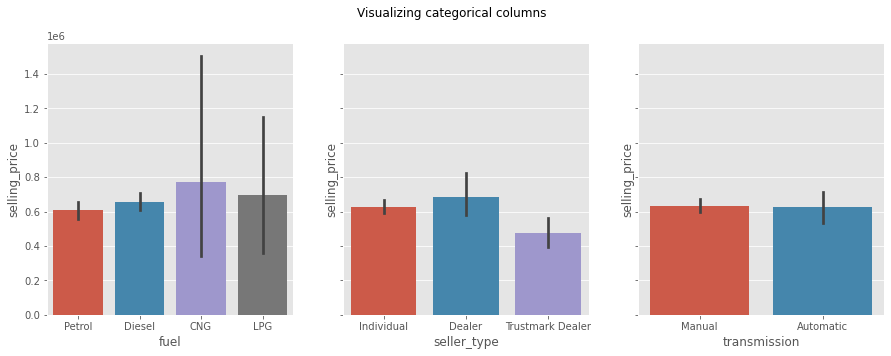

In [29]:
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey= True)
fig.suptitle("Visualizing categorical columns")
sns.barplot(x=Fuel_type, y=selling_price, ax=axes[0])
sns.barplot(x=seller_type, y=selling_price, ax=axes[1])
sns.barplot(x=transmission_type, y=selling_price, ax=axes[2])

In [30]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between the column")
plt.show()